# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [2]:
# Your code here! :)
df = pd.read_csv("GermanCredit.csv.zip")
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [3]:
X = df.drop(columns=["Class"])
y = df.Class

In [48]:
X.columns

Index(['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration',
       'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone',
       'ForeignWorker', 'CheckingAccountStatus.lt.0',
       'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200',
       'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid',
       'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly',
       'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar',
       'Purpose.UsedCar', 'Purpose.Furniture.Equipment',
       'Purpose.Radio.Television', 'Purpose.DomesticAppliance',
       'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation',
       'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other',
       'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500',
       'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000',
       'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1',
       'EmploymentDuration.1.to.4', 'Emp

In [4]:
from sklearn.preprocessing import LabelEncoder

# convert labels to numerical for visualization later on
le = LabelEncoder()
le.fit(y.values)
y_encoded = le.transform(y)

In [5]:
# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded,test_size=0.3,random_state=42)


In [6]:
parameters = {'criterion':['gini','entropy'],
              'max_depth':[2,4,6,8,10,12,None]}

best = GridSearchCV(DecisionTreeClassifier(),param_grid=parameters)
best.fit(X_train, y_train)
best.best_params_

{'criterion': 'gini', 'max_depth': 4}

In [80]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)


print(classification_report(tree_clf.predict(X_test), y_test,target_names=["Bad","Good"]))

              precision    recall  f1-score   support

         Bad       0.35      0.44      0.39        73
        Good       0.80      0.74      0.77       227

    accuracy                           0.67       300
   macro avg       0.58      0.59      0.58       300
weighted avg       0.69      0.67      0.68       300



### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [18]:
# Your code here! :)
import dtreeviz

/Users/frankpang/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


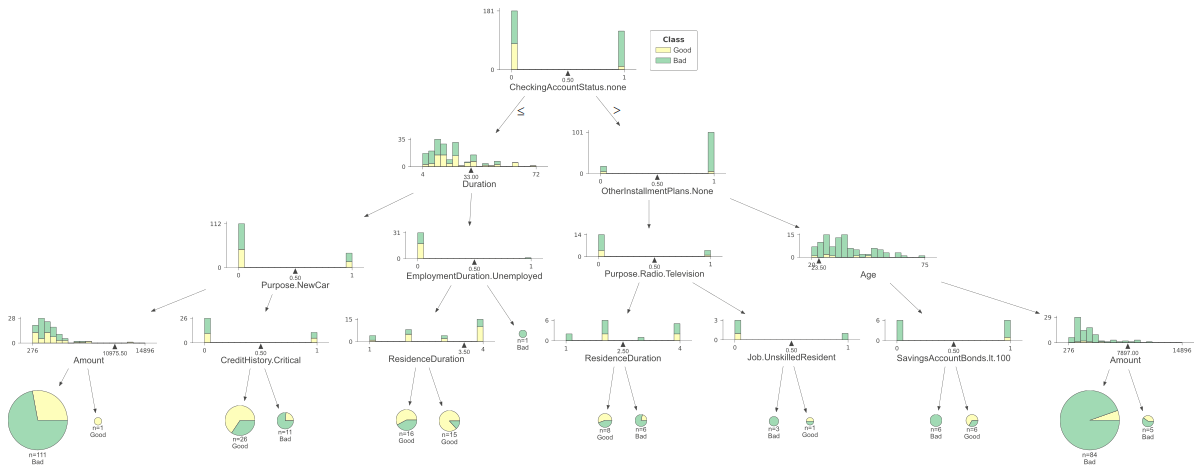

In [19]:

viz = dtreeviz.model(clf,X_train=X_test, y_train=y_test,
                     feature_names=list(X_test.columns),
                     target_name="Class", class_names=["Good", "Bad"])
viz.view()

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
# Your code here! :)

parameters = {'n_estimators':[100,200,500],
              'criterion':['gini','entropy'],
              'max_depth':[2,4,6,8,10,12,None]}

best = GridSearchCV(RandomForestClassifier(),param_grid=parameters)
best.fit(X_train, y_train)
best.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 200}

In [81]:
rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=200,max_depth=10)
rf_clf.fit(X_train, y_train)


print(classification_report(rf_clf.predict(X_test), y_test,target_names=["Bad","Good"]))

              precision    recall  f1-score   support

         Bad       0.30      0.75      0.43        36
        Good       0.96      0.76      0.85       264

    accuracy                           0.76       300
   macro avg       0.63      0.75      0.64       300
weighted avg       0.88      0.76      0.80       300



As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [41]:
# Your code here!
import matplotlib.pyplot as plt
import time
import numpy as np

In [42]:
start_time = time.time()
importances = rf_clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.026 seconds


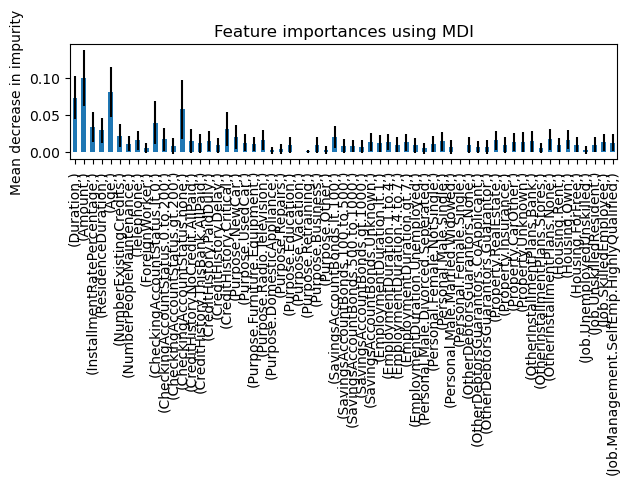

In [51]:
feature_names = [X.columns]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

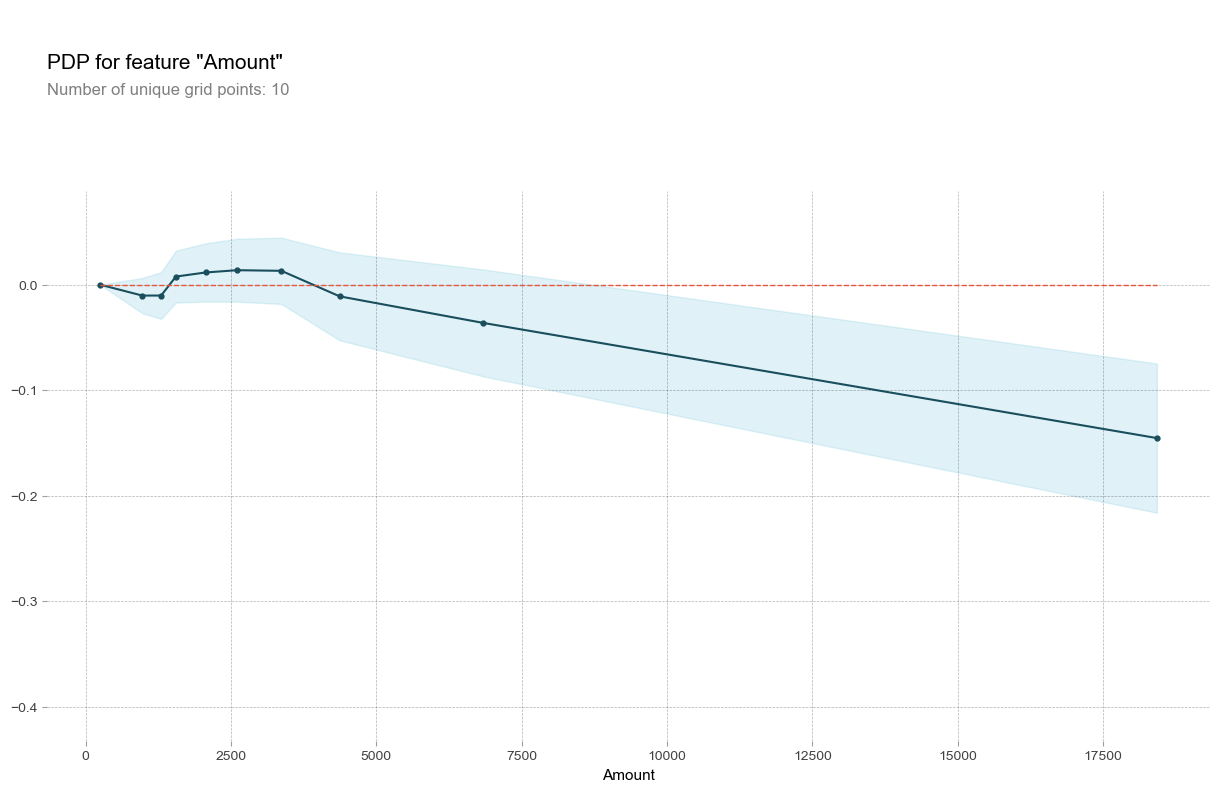

In [69]:
from pdpbox import pdp

pdp_amount = pdp.pdp_isolate(model=rf_clf,
                          dataset=X,
                          model_features=X.columns,
                          feature='Amount')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_amount, feature_name='Amount')

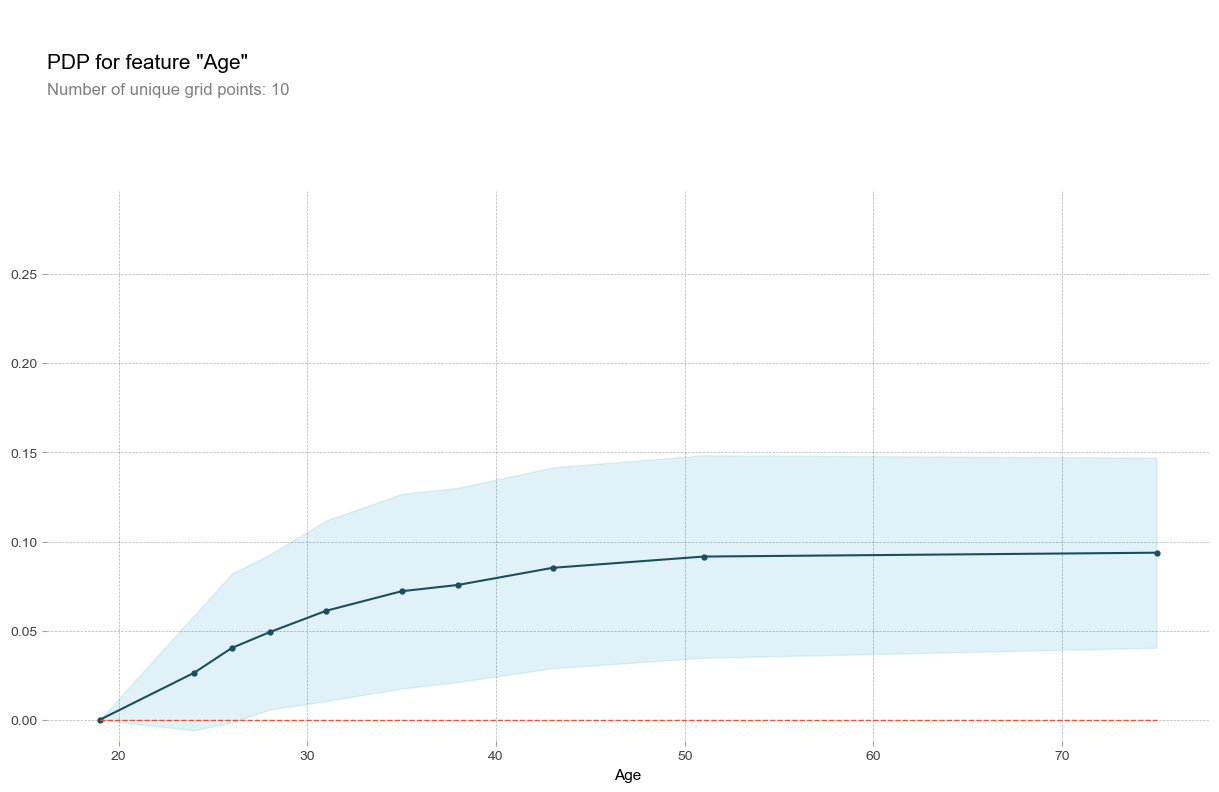

In [70]:
pdp_age = pdp.pdp_isolate(model=rf_clf,
                          dataset=X,
                          model_features=X.columns,
                          feature='Age')
fig, axes = pdp.pdp_plot(pdp_isolate_out=pdp_age, feature_name='Age')

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [76]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [86]:
parameters = {'eta':[0.001,0.01,0.1,0.2,0.3],
              'max_depth':[2,4,6,8,10,12,None],
              'eval_metric':['mlogloss'],}

best = GridSearchCV(XGBClassifier(),param_grid=parameters)
best.fit(X_train, y_train)
best.best_params_

{'eta': 0.2, 'eval_metric': 'mlogloss', 'max_depth': 2}

In [87]:
xgb_clf = XGBClassifier(eta=0.2,max_depth=2)
xgb_clf.fit(X_train, y_train)
print(classification_report(xgb_clf.predict(X_test), y_test,target_names=["Bad","Good"]))

[22:48:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         Bad       0.44      0.68      0.53        59
        Good       0.91      0.79      0.84       241

    accuracy                           0.77       300
   macro avg       0.67      0.73      0.69       300
weighted avg       0.82      0.77      0.78       300



In [75]:
cat_clf = CatBoostClassifier()
cat_clf.fit(X_train, y_train)
print(classification_report(cat_clf.predict(X_test), y_test,target_names=["Bad","Good"]))

Learning rate set to 0.008847
0:	learn: 0.6896949	total: 59.9ms	remaining: 59.9s
1:	learn: 0.6859378	total: 61.5ms	remaining: 30.7s
2:	learn: 0.6822440	total: 63ms	remaining: 20.9s
3:	learn: 0.6790305	total: 64.4ms	remaining: 16s
4:	learn: 0.6745593	total: 66.1ms	remaining: 13.2s
5:	learn: 0.6716149	total: 68.1ms	remaining: 11.3s
6:	learn: 0.6684704	total: 69.4ms	remaining: 9.85s
7:	learn: 0.6652340	total: 70.9ms	remaining: 8.79s
8:	learn: 0.6618677	total: 72.5ms	remaining: 7.99s
9:	learn: 0.6598491	total: 73.9ms	remaining: 7.31s
10:	learn: 0.6570160	total: 76.1ms	remaining: 6.84s
11:	learn: 0.6543308	total: 77.4ms	remaining: 6.37s
12:	learn: 0.6515283	total: 78.7ms	remaining: 5.97s
13:	learn: 0.6489191	total: 79.9ms	remaining: 5.63s
14:	learn: 0.6455112	total: 81.7ms	remaining: 5.37s
15:	learn: 0.6429218	total: 83.3ms	remaining: 5.12s
16:	learn: 0.6401674	total: 85.1ms	remaining: 4.92s
17:	learn: 0.6379353	total: 86.3ms	remaining: 4.71s
18:	learn: 0.6352756	total: 87.6ms	remaining: 4.

205:	learn: 0.4249121	total: 365ms	remaining: 1.41s
206:	learn: 0.4244877	total: 367ms	remaining: 1.41s
207:	learn: 0.4240437	total: 369ms	remaining: 1.4s
208:	learn: 0.4234876	total: 370ms	remaining: 1.4s
209:	learn: 0.4228002	total: 372ms	remaining: 1.4s
210:	learn: 0.4221473	total: 374ms	remaining: 1.4s
211:	learn: 0.4215529	total: 375ms	remaining: 1.39s
212:	learn: 0.4210720	total: 390ms	remaining: 1.44s
213:	learn: 0.4204768	total: 393ms	remaining: 1.44s
214:	learn: 0.4198699	total: 394ms	remaining: 1.44s
215:	learn: 0.4191720	total: 397ms	remaining: 1.44s
216:	learn: 0.4187483	total: 399ms	remaining: 1.44s
217:	learn: 0.4181741	total: 401ms	remaining: 1.44s
218:	learn: 0.4176807	total: 439ms	remaining: 1.56s
219:	learn: 0.4171906	total: 441ms	remaining: 1.56s
220:	learn: 0.4165238	total: 443ms	remaining: 1.56s
221:	learn: 0.4158462	total: 449ms	remaining: 1.57s
222:	learn: 0.4152912	total: 453ms	remaining: 1.58s
223:	learn: 0.4146836	total: 455ms	remaining: 1.57s
224:	learn: 0.41

424:	learn: 0.3302229	total: 740ms	remaining: 1s
425:	learn: 0.3299150	total: 742ms	remaining: 999ms
426:	learn: 0.3295528	total: 743ms	remaining: 998ms
427:	learn: 0.3291509	total: 745ms	remaining: 995ms
428:	learn: 0.3288653	total: 746ms	remaining: 993ms
429:	learn: 0.3284989	total: 748ms	remaining: 991ms
430:	learn: 0.3283449	total: 749ms	remaining: 989ms
431:	learn: 0.3280447	total: 751ms	remaining: 987ms
432:	learn: 0.3277311	total: 752ms	remaining: 985ms
433:	learn: 0.3274723	total: 753ms	remaining: 983ms
434:	learn: 0.3271954	total: 755ms	remaining: 981ms
435:	learn: 0.3269948	total: 756ms	remaining: 978ms
436:	learn: 0.3267149	total: 758ms	remaining: 976ms
437:	learn: 0.3264954	total: 759ms	remaining: 974ms
438:	learn: 0.3263240	total: 760ms	remaining: 972ms
439:	learn: 0.3261131	total: 762ms	remaining: 970ms
440:	learn: 0.3257520	total: 765ms	remaining: 969ms
441:	learn: 0.3253044	total: 767ms	remaining: 968ms
442:	learn: 0.3249628	total: 769ms	remaining: 966ms
443:	learn: 0.3

613:	learn: 0.2751956	total: 1.11s	remaining: 697ms
614:	learn: 0.2750434	total: 1.11s	remaining: 695ms
615:	learn: 0.2748359	total: 1.11s	remaining: 693ms
616:	learn: 0.2746644	total: 1.11s	remaining: 692ms
617:	learn: 0.2744046	total: 1.11s	remaining: 690ms
618:	learn: 0.2741818	total: 1.12s	remaining: 688ms
619:	learn: 0.2739472	total: 1.12s	remaining: 686ms
620:	learn: 0.2737298	total: 1.12s	remaining: 684ms
621:	learn: 0.2734199	total: 1.12s	remaining: 682ms
622:	learn: 0.2732211	total: 1.12s	remaining: 680ms
623:	learn: 0.2729774	total: 1.13s	remaining: 678ms
624:	learn: 0.2727652	total: 1.13s	remaining: 677ms
625:	learn: 0.2724705	total: 1.13s	remaining: 676ms
626:	learn: 0.2722702	total: 1.13s	remaining: 674ms
627:	learn: 0.2719713	total: 1.14s	remaining: 673ms
628:	learn: 0.2718005	total: 1.14s	remaining: 671ms
629:	learn: 0.2715822	total: 1.14s	remaining: 669ms
630:	learn: 0.2712751	total: 1.14s	remaining: 667ms
631:	learn: 0.2710949	total: 1.14s	remaining: 665ms
632:	learn: 

812:	learn: 0.2295044	total: 1.48s	remaining: 341ms
813:	learn: 0.2293354	total: 1.48s	remaining: 339ms
814:	learn: 0.2292463	total: 1.49s	remaining: 337ms
815:	learn: 0.2290141	total: 1.49s	remaining: 335ms
816:	learn: 0.2287531	total: 1.49s	remaining: 333ms
817:	learn: 0.2285390	total: 1.49s	remaining: 331ms
818:	learn: 0.2283644	total: 1.49s	remaining: 329ms
819:	learn: 0.2281723	total: 1.49s	remaining: 328ms
820:	learn: 0.2279453	total: 1.49s	remaining: 326ms
821:	learn: 0.2276758	total: 1.5s	remaining: 324ms
822:	learn: 0.2275305	total: 1.5s	remaining: 322ms
823:	learn: 0.2273284	total: 1.5s	remaining: 320ms
824:	learn: 0.2270635	total: 1.5s	remaining: 318ms
825:	learn: 0.2268714	total: 1.5s	remaining: 316ms
826:	learn: 0.2266411	total: 1.5s	remaining: 314ms
827:	learn: 0.2264115	total: 1.5s	remaining: 312ms
828:	learn: 0.2262841	total: 1.5s	remaining: 310ms
829:	learn: 0.2260708	total: 1.5s	remaining: 308ms
830:	learn: 0.2259164	total: 1.51s	remaining: 306ms
831:	learn: 0.2257611

In [89]:
parameters = {'learning_rate':[0.001,0.01,0.1,0.2,0.3],
              'max_depth':[2,4,6,8,10,12,None]}

best = GridSearchCV(LGBMClassifier(),param_grid=parameters)
best.fit(X_train, y_train)
best.best_params_

{'learning_rate': 0.01, 'max_depth': 12}

In [90]:
lgbm_clf = LGBMClassifier(learning_rate=0.01,max_depth=12)
lgbm_clf.fit(X_train, y_train)
print(classification_report(lgbm_clf.predict(X_test), y_test,target_names=["Bad","Good"]))

              precision    recall  f1-score   support

         Bad       0.22      0.87      0.35        23
        Good       0.99      0.74      0.85       277

    accuracy                           0.75       300
   macro avg       0.60      0.81      0.60       300
weighted avg       0.93      0.75      0.81       300



Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

In [91]:
from sklearn.metrics import accuracy_score
df_score = pd.DataFrame([['Decision Tree',accuracy_score(y_test,tree_clf.predict(X_test))],
                         ['Random Forest',accuracy_score(y_test,rf_clf.predict(X_test))],
                         ['XGBoost',accuracy_score(y_test,xgb_clf.predict(X_test))],
                         ['Catboost',accuracy_score(y_test,cat_clf.predict(X_test))],
                         ['LGBM',accuracy_score(y_test,lgbm_clf.predict(X_test))]],columns=['Model','Accuracy'])
df_score

,Model,Accuracy
0,Decision Tree,0.666667
1,Random Forest,0.756667
2,XGBoost,0.766667
3,Catboost,0.790000
4,LGBM,0.753333
